# Filtering the 2 datasets , merging, fixing time interval, dtypes optimization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
%matplotlib inline
import pandas as pd
import os

the main dataset we will use consist of 2 sets of files: **the main LOB files**, which contains daily data about LOB for all available options on each day, and **the chains dataset** which contains other type of data (such as underlying price, greeks, etc) also about all available options in a given day. We have 28 days, thus 28 files of each set. We focus only on 0DTE options, which are options that expire on the same day. So first we need to filter both data sets to select options that are 0dte and then merging the 2 sets.

Filtering 0dte  example:

In [ ]:


# here is a file from the first datasets (LOB), which contains snapshots of the LOB of all available options on 01-01-2025 (up to 25 levels)
file_path = "deribit_book_snapshot_25_2025-01-01_OPTIONS.csv"
df = pd.read_csv(file_path)

#for this date we can filter the data for symbols containing 'BTC-1JAN'
df_filtered = df[df['symbol'].str.contains('BTC-1JAN', na=False)]



df_filtered["timestamp"] = pd.to_datetime(df_filtered["timestamp"], unit="us")

#  the result is : 28 files that contains only options that expire on the same day (all start with BTC-1JAN if the date is 01-01-2025)
# these files contains up to 25 levels of LOB, we will keep only 5, and add very simple steps (such as mid-price) to the files
df_filtered.columns = df.columns.str.replace(r'[\.\s]', '_', regex=True)

levels = 5
ask_prices = [f"asks_{i}__price" for i in range(levels)]
ask_amounts = [f"asks_{i}__amount" for i in range(levels)]
bid_prices = [f"bids_{i}__price" for i in range(levels)]
bid_amounts = [f"bids_{i}__amount" for i in range(levels)]

columns_to_keep = ["symbol", "timestamp", "local_timestamp", "mid_price"] + ask_prices + ask_amounts + bid_prices + bid_amounts
df_filtered = df_filtered[columns_to_keep]
df_filtered.to_csv("BTC-1JAN.csv", index=False)
# we did this for all 28 files through a function and a for loop(code is too long to put here)
# then we combined all files in one df called combined_lob

We did the same filtering proccess to the other dataset (chains) then combined all days in one file called underlying_all

In [ ]:

# A function to filter the chain data: extract data for each day
 
file_to_expiry = {
    "deribit_options_chain_2025-01-01_OPTIONS.csv.gz": "1JAN25",
    "deribit_options_chain_2025-01-02_OPTIONS.csv.gz": "2JAN25",
    "deribit_options_chain_2025-01-03_OPTIONS.csv.gz": "3JAN25",
    "deribit_options_chain_2025-01-04_OPTIONS.csv.gz": "4JAN25",
    "deribit_options_chain_2025-01-05_OPTIONS.csv.gz": "5JAN25",
    "deribit_options_chain_2025-01-06_OPTIONS.csv.gz": "6JAN25",
    "deribit_options_chain_2025-01-07_OPTIONS.csv.gz": "7JAN25",
    "deribit_options_chain_2025-01-08_OPTIONS.csv.gz": "8JAN25",
    "deribit_options_chain_2025-01-09_OPTIONS.csv.gz": "9JAN25",
    "deribit_options_chain_2025-01-10_OPTIONS.csv.gz": "10JAN25",
    "deribit_options_chain_2025-01-11_OPTIONS.csv.gz": "11JAN25",
    "deribit_options_chain_2025-01-12_OPTIONS.csv.gz": "12JAN25",
    "deribit_options_chain_2025-01-13_OPTIONS.csv.gz": "13JAN25",
    "deribit_options_chain_2025-01-14_OPTIONS.csv.gz": "14JAN25",
    "deribit_options_chain_2025-01-15_OPTIONS.csv.gz": "15JAN25",
    "deribit_options_chain_2025-01-16_OPTIONS.csv.gz": "16JAN25",
    "deribit_options_chain_2025-01-17_OPTIONS.csv.gz": "17JAN25",
    "deribit_options_chain_2025-01-18_OPTIONS.csv.gz": "18JAN25",
    "deribit_options_chain_2025-01-19_OPTIONS.csv.gz": "19JAN25",
    "deribit_options_chain_2025-01-20_OPTIONS.csv.gz": "20JAN25",
    "deribit_options_chain_2025-01-21_OPTIONS.csv.gz": "21JAN25",
    "deribit_options_chain_2025-01-22_OPTIONS.csv.gz": "22JAN25",
    "deribit_options_chain_2025-01-23_OPTIONS.csv.gz": "23JAN25",
    "deribit_options_chain_2025-01-24_OPTIONS.csv.gz": "24JAN25",
    "deribit_options_chain_2025-01-25_OPTIONS.csv.gz": "25JAN25",
    "deribit_options_chain_2025-01-26_OPTIONS.csv.gz": "26JAN25",
    "deribit_options_chain_2025-01-27_OPTIONS.csv.gz": "27JAN25",
    "deribit_options_chain_2025-01-28_OPTIONS.csv.gz": "28JAN25",
}

def filter_options_by_expiry(folder_path, file_path, save_path, chunk_size=100000):
    full_file_path = os.path.join(folder_path, file_path)
    expiry_date = file_to_expiry.get(file_path)
    
    if expiry_date is None:
        print(f"No expiry date found for {file_path}. Skipping file.")
        return
    
   
    filtered_data = []
    
    for chunk in pd.read_csv(full_file_path, compression='gzip', chunksize=chunk_size):
        filtered_chunk = chunk[
            chunk['symbol'].str.startswith(f'BTC-{expiry_date}') 
        ]
        filtered_data.append(filtered_chunk)
    
  
    df_filtered = pd.concat(filtered_data, axis=0)

    output_filename = f"{expiry_date}_underlying.pkl"
    output_filepath = os.path.join(save_path, output_filename)
    
    
    df_filtered.to_pickle(output_filepath)
    print(f"Filtered data saved to {output_filepath}")

folder_path = cwd 
save_path = cwd  

files = [

   
#all files were here and processed already. (examples:)
    "deribit_options_chain_2025-01-23_OPTIONS.csv.gz",
    "deribit_options_chain_2025-01-24_OPTIONS.csv.gz",
    "deribit_options_chain_2025-01-25_OPTIONS.csv.gz",
    "deribit_options_chain_2025-01-26_OPTIONS.csv.gz",
    "deribit_options_chain_2025-01-27_OPTIONS.csv.gz",
    "deribit_options_chain_2025-01-28_OPTIONS.csv.gz"
]


for file in files:
    filter_options_by_expiry(folder_path, file, save_path, chunk_size=300000)


### Sanity checks:

In [9]:
#to see what options are in a file, is it only the expireing ones ?(0DTE)

file_path = "/gpfs/home5/talkanbar/underlying/3JAN25_underlying.pkl"
df = pd.read_pickle(file_path)
#we check the underlying_index because there were many assets in the file. 
unique_underlying_indices = df['underlying_index'].unique()
print(f"Unique values in 'underlying_index': {unique_underlying_indices}")


Unique values in 'underlying_index': ['BTC-3JAN25' 'SYN.EXPIRY']


In [10]:
unique_underlying_indices = df['underlying_index'].unique()
print(f"Unique values in 'underlying_index': {unique_underlying_indices}")
value_counts = df['underlying_index'].value_counts()
print("\nCounts of each unique value:")
print(value_counts)
print("\nCounts of each unique value (iterative method):")
for index in unique_underlying_indices:
    count = len(df[df['underlying_index'] == index])
    print(f"{index}: {count} rows")

Unique values in 'underlying_index': ['BTC-3JAN25' 'SYN.EXPIRY']

Counts of each unique value:
underlying_index
BTC-3JAN25    1134742
SYN.EXPIRY       3422
Name: count, dtype: int64

Counts of each unique value (iterative method):
BTC-3JAN25: 1134742 rows
SYN.EXPIRY: 3422 rows


In [1]:

cwd = '/gpfs/home5/talkanbar/underlying'
print("Current working directory:", cwd)

Current working directory: /gpfs/home5/talkanbar/underlying


In [6]:
os.listdir(cwd)

['deribit_options_chain_2025-01-03_OPTIONS.csv.gz',
 'deribit_options_chain_2025-01-20_OPTIONS.csv.gz',
 'deribit_options_chain_2025-01-09_OPTIONS.csv.gz',
 'deribit_options_chain_2025-01-04_OPTIONS.csv.gz',
 'deribit_options_chain_2025-01-10_OPTIONS.csv.gz',
 'deribit_options_chain_2025-01-08_OPTIONS.csv.gz',
 'deribit_options_chain_2025-01-16_OPTIONS.csv.gz',
 'deribit_options_chain_2025-01-17_OPTIONS.csv.gz',
 'deribit_options_chain_2025-01-28_OPTIONS.csv.gz',
 'deribit_options_chain_2025-01-14_OPTIONS.csv.gz',
 'deribit_options_chain_2025-01-06_OPTIONS.csv.gz',
 'deribit_options_chain_2025-01-11_OPTIONS.csv.gz',
 'deribit_options_chain_2025-01-26_OPTIONS.csv.gz',
 'deribit_options_chain_2025-01-27_OPTIONS.csv.gz',
 'deribit_options_chain_2025-01-24_OPTIONS.csv.gz',
 'deribit_options_chain_2025-01-19_OPTIONS.csv.gz',
 'deribit_options_chain_2025-01-23_OPTIONS.csv.gz',
 'deribit_options_chain_2025-01-05_OPTIONS.csv.gz',
 'deribit_options_chain_2025-01-07_OPTIONS.csv.gz',
 'deribit_op

In [2]:
folder_path = "/gpfs/home5/talkanbar/underlying"
file_name = "underlying_all.pkl"
file_path = os.path.join(folder_path, file_name)

df = pd.read_pickle(file_path)


In [10]:
df

,exchange,symbol,timestamp,local_timestamp,type,strike_price,expiration,open_interest,last_price,bid_price,...,underlying_index,underlying_price,delta,gamma,vega,theta,rho,expiry,date,hour
0,deribit,BTC-10JAN25-97000-C,2025-01-09 23:59:59.569,1736467200386146,call,97000.0,1736496000000000,482.2,0.0001,NaN,...,BTC-10JAN25,92574.56,0.02122,0.00002,1.42435,-16.54560,0.01779,10JAN25,2025-01-09,23
1,deribit,BTC-10JAN25-92000-C,2025-01-10 00:00:00.227,1736467200386214,call,92000.0,1736496000000000,89.0,0.0100,0.0085,...,BTC-10JAN25,92574.56,0.66768,0.00027,10.15974,-245.53601,0.55651,10JAN25,2025-01-10,0
2,deribit,BTC-10JAN25-75000-C,2025-01-09 23:59:59.569,1736467200386263,call,75000.0,1736496000000000,1.1,0.1820,0.1885,...,BTC-10JAN25,92574.56,1.00000,0.00000,0.00000,0.00000,0.68493,10JAN25,2025-01-09,23
3,deribit,BTC-10JAN25-114000-C,2025-01-09 23:59:59.522,1736467200386266,call,114000.0,1736496000000000,58.7,0.0001,NaN,...,BTC-10JAN25,92574.56,0.00000,0.00000,0.00000,0.00000,0.00000,10JAN25,2025-01-09,23
4,deribit,BTC-10JAN25-105000-C,2025-01-09 23:59:59.569,1736467200386372,call,105000.0,1736496000000000,1176.6,0.0001,NaN,...,BTC-10JAN25,92574.56,0.00000,0.00000,0.00000,-0.00001,0.00000,10JAN25,2025-01-09,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23428035,deribit,BTC-28JAN25-106000-C,2025-01-28 08:00:00.223,1738051214322618,call,106000.0,1738051200000000,0.0,0.0001,NaN,...,SYN.EXPIRY,102879.80,0.00000,0.00000,0.00000,0.00000,0.00000,28JAN25,2025-01-28,8
23428036,deribit,BTC-28JAN25-122000-P,2025-01-28 08:00:00.221,1738051214327335,put,122000.0,1738051200000000,0.0,NaN,NaN,...,SYN.EXPIRY,102879.80,0.00000,0.00000,0.00000,0.00000,0.00000,28JAN25,2025-01-28,8
23428037,deribit,BTC-28JAN25-99000-C,2025-01-28 08:00:00.219,1738051214327962,call,99000.0,1738051200000000,0.0,0.0330,NaN,...,SYN.EXPIRY,102879.80,0.00000,0.00000,0.00000,0.00000,0.00000,28JAN25,2025-01-28,8
23428038,deribit,BTC-28JAN25-97500-P,2025-01-28 08:00:00.220,1738051214333991,put,97500.0,1738051200000000,0.0,0.0001,NaN,...,SYN.EXPIRY,102879.80,0.00000,0.00000,0.00000,0.00000,0.00000,28JAN25,2025-01-28,8


Checking unique values for index

In [4]:


df['expiry'] = df['symbol'].str.extract(r'BTC-(\d+JAN25)')  # Extract expiry

# Filter for 10JAN25
df_10jan = df[df['expiry'] == "10JAN25"]
unique_underlying_10jan = df_10jan['underlying_index'].unique()
print("Unique underlying_index values for 10JAN25:")
print(unique_underlying_10jan)


Unique underlying_index values for 10JAN25:
['BTC-10JAN25' 'SYN.EXPIRY']


I expected that the underlying index should be always the option (e.g. BTC-10JAN25), but I found SYN.EXPIRY so more understanding was needed

In [5]:


df['expiry'] = df['symbol'].str.extract(r'BTC-(\d+JAN25)')

expiry_underlying_mapping = df.groupby('expiry')['underlying_index'].unique().reset_index()

expiry_underlying_mapping.columns = ['Day', 'Unique_Underlying_Index']

expiry_underlying_mapping['Unique_Underlying_Index'] = expiry_underlying_mapping['Unique_Underlying_Index'].apply(lambda x: ', '.join(x))

print(expiry_underlying_mapping)


        Day      Unique_Underlying_Index
0   10JAN25      BTC-10JAN25, SYN.EXPIRY
1   11JAN25  SYN.BTC-11JAN25, SYN.EXPIRY
2   12JAN25  SYN.BTC-12JAN25, SYN.EXPIRY
3   13JAN25  SYN.BTC-13JAN25, SYN.EXPIRY
4   14JAN25  SYN.BTC-14JAN25, SYN.EXPIRY
5   15JAN25  SYN.BTC-15JAN25, SYN.EXPIRY
6   16JAN25  SYN.BTC-16JAN25, SYN.EXPIRY
7   17JAN25      BTC-17JAN25, SYN.EXPIRY
8   18JAN25  SYN.BTC-18JAN25, SYN.EXPIRY
9   19JAN25  SYN.BTC-19JAN25, SYN.EXPIRY
10   1JAN25   SYN.BTC-1JAN25, SYN.EXPIRY
11  20JAN25  SYN.BTC-20JAN25, SYN.EXPIRY
12  21JAN25  SYN.BTC-21JAN25, SYN.EXPIRY
13  22JAN25  SYN.BTC-22JAN25, SYN.EXPIRY
14  23JAN25  SYN.BTC-23JAN25, SYN.EXPIRY
15  24JAN25      BTC-24JAN25, SYN.EXPIRY
16  25JAN25  SYN.BTC-25JAN25, SYN.EXPIRY
17  26JAN25  SYN.BTC-26JAN25, SYN.EXPIRY
18  27JAN25  SYN.BTC-27JAN25, SYN.EXPIRY
19  28JAN25  SYN.BTC-28JAN25, SYN.EXPIRY
20   2JAN25   SYN.BTC-2JAN25, SYN.EXPIRY
21   3JAN25       BTC-3JAN25, SYN.EXPIRY
22   4JAN25   SYN.BTC-4JAN25, SYN.EXPIRY
23   5JAN25   SY

which time SYN.EXPIRY appear?  answer after analysis: appear just before expiration. We ignored this and concluded that filtering was sucessful

In [16]:

df_expiry_4jan = df[(df['expiry'] == "4JAN25") & (df['underlying_index'] == "SYN.EXPIRY")]

min_time = df_expiry_4jan['timestamp'].min()
max_time = df_expiry_4jan['timestamp'].max()

print(f"SYN.EXPIRY appeared on 4JAN25 from {min_time} to {max_time}.")


SYN.EXPIRY appeared on 4JAN25 from 2025-01-04 07:30:06.289000 to 2025-01-04 08:00:00.094000.


In [17]:
df_expiry_4jan['expiration']

5542764   2025-01-04 08:00:00
5542791   2025-01-04 08:00:00
5542816   2025-01-04 08:00:00
5542817   2025-01-04 08:00:00
5542818   2025-01-04 08:00:00
                  ...        
5557605   2025-01-04 08:00:00
5557606   2025-01-04 08:00:00
5557607   2025-01-04 08:00:00
5557608   2025-01-04 08:00:00
5557609   2025-01-04 08:00:00
Name: expiration, Length: 11197, dtype: datetime64[ns]

### Merging the two sets

We merged the 2 sets based on the timestamp and symbol. However the 2 sets contains options data based on change (once a change in the data occurs, a new row is added with a timestamp). We were not sure if all timestamps would be found in the 2 sets. Thus we used the "nearest" methode to look for the closest timestamp.

In [ ]:
underlying_all = underlying_all.drop(columns=['exchange', 'type'])

# Rename specific columns to track their origin (from which dataset they come)
underlying_all = underlying_all.rename(columns={
    'timestamp': 'timestamp_underlying',
    'local_timestamp': 'local_timestamp_underlying',
    'date': 'date_underlying',
    'hour': 'hour_underlying'
})
# Sort both DataFrames by timestamp
combined_lob = combined_lob.sort_values(by="timestamp")
underlying_all = underlying_all.sort_values(by="timestamp_underlying")
# Merge using  nearest timestamp match
merged_df = pd.merge_asof(
    combined_lob,
    underlying_all,
    left_on="timestamp",
    right_on="timestamp_underlying",
    by="symbol", 
    direction="nearest"  
)


some checks to make sure the merging was succesfull: 

In [ ]:

# Calculate the absolute time difference in seconds
merged_df['time_diff_seconds'] = abs(merged_df['timestamp'] - merged_df['timestamp_underlying']) / 1e6  # Convert microseconds to seconds

# Scatter plot to check the time diff
plt.figure(figsize=(6, 3))
sns.histplot(merged_df['time_diff_seconds'], bins=50, kde=True)
plt.xlabel("Time Difference (seconds)")
plt.ylabel("Frequency")
plt.title("Distribution of Timestamp Differences")
plt.grid(True)
plt.show()
plt.close()
# Scatter plot to check alignment
plt.figure(figsize=(6, 3))
sns.scatterplot(data=merged_df, x='timestamp', y='timestamp_underlying', alpha=0.5)
plt.xlabel("LOB Timestamp")
plt.ylabel("Underlying Timestamp")
plt.title("Scatter Plot of Timestamps")
plt.grid(True)
plt.show()
plt.close()

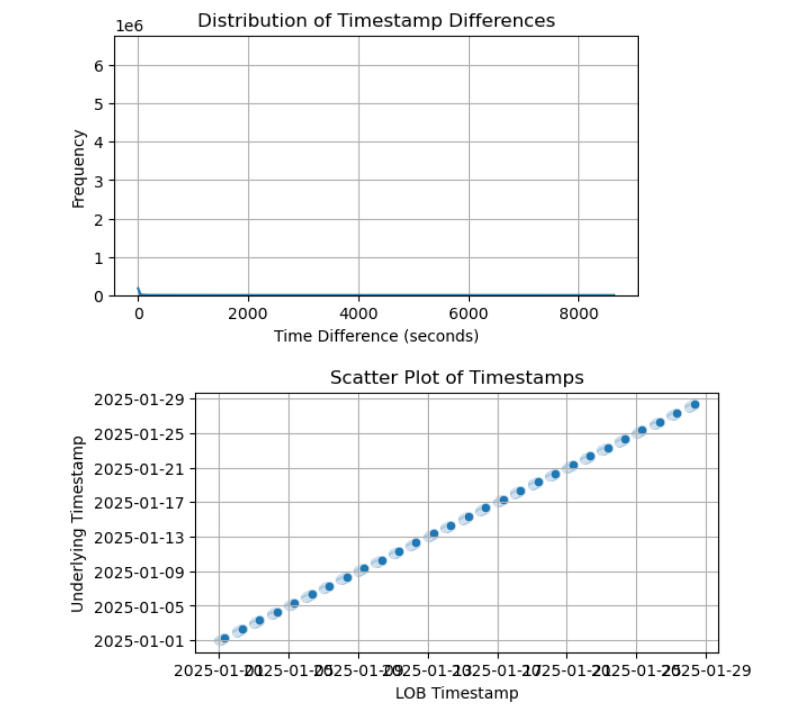

In [ ]:
merged_df['time_diff_seconds'].max()

Timedelta('0 days 00:00:00.000008645')

Conclusion : merging was succesful!

we calculated difference in timestamp after merging and visualized it: it looks good, no big differnece.

### Fixed interval

intervals between the snapshots are not fixed but we want to create fixed intervals for the model

In [ ]:
def process_symbols_individually(original_df, freq='1s', output_dir='symbol_pkl_files'):
    #    Processes each symbol individually, applies fixed-interval resampling, and saves as .pkl. Why? when we fix interval we will look at the nearest, 
    # so it's important to separate each symbol and apply the interval fix , then we combine them later
    df = original_df.copy()

    df['timestamp'] = pd.to_datetime(df['timestamp'])
    symbols = df['symbol'].unique()

    os.makedirs(output_dir, exist_ok=True)
    pkl_files = []
    for symbol in tqdm(symbols, desc="Processing symbols"):
        symbol_df = df[df['symbol'] == symbol]
        if symbol_df.empty or len(symbol_df) < 2:
            continue
        
        # Apply fixed-interval resampling
        fixed_symbol_df = create_fixed_interval_df(symbol_df, freq=freq)
        fixed_symbol_df['symbol'] = symbol
        

        pkl_file = os.path.join(output_dir, f'{symbol}.pkl')
        fixed_symbol_df.to_pickle(pkl_file)
        pkl_files.append(pkl_file)

    return pkl_files

def create_fixed_interval_df(original_df, freq='1s'):
    original_df = original_df.copy()
    original_df['timestamp'] = pd.to_datetime(original_df['timestamp'])
    original_df = original_df.sort_values('timestamp').reset_index(drop=True)

    start = original_df['timestamp'].min()
    end = original_df['timestamp'].max()
    fixed_times = pd.date_range(start=start, end=end, freq=freq)

    fixed_df = pd.DataFrame({'timestamp_fixed': fixed_times})
    resampled_df = pd.merge_asof(
        fixed_df,
        original_df,
        left_on='timestamp_fixed',
        right_on='timestamp',
        direction='nearest'  
    )

    return resampled_df

output_directory = 'symbol_pkl_files'  
pkl_files = process_symbols_individually(
    merged_df,
    freq='1s',         
    output_dir=output_directory
)

#now we have one file per symbol, with fixed interval (1S)


Processing symbols: 100%|██████████| 1698/1698 [00:38<00:00, 43.97it/s]


looping through all pkl files and optimizing them.
i changed that now, i optimized the original merged_df (only norms) then created fixed intervals. now i will just combine themb

In [ ]:
def optimize_dataframe(df):
    """Optimizes DataFrame data types to reduce memory usage."""
    optimized_dtypes = {}
    for col in df.columns:
        original_dtype = df[col].dtype
        if pd.api.types.is_numeric_dtype(df[col]):
            min_val = df[col].min()
            max_val = df[col].max()
            if pd.api.types.is_float_dtype(df[col]):
                if df[col].isnull().any():
                    optimized_dtypes[col] = original_dtype
                    continue
                df[col] = df[col].astype(np.float32)
                optimized_dtypes[col] = np.float32
            else:
                if df[col].isnull().any():
                    optimized_dtypes[col] = original_dtype
                    continue
                if min_val >= 0:
                    if max_val <= np.iinfo(np.uint8).max:
                        df[col] = df[col].astype(np.uint8)
                        optimized_dtypes[col] = np.uint8
                    elif max_val <= np.iinfo(np.uint16).max:
                        df[col] = df[col].astype(np.uint16)
                        optimized_dtypes[col] = np.uint16
                    elif max_val <= np.iinfo(np.uint32).max:
                        df[col] = df[col].astype(np.uint32)
                        optimized_dtypes[col] = np.uint32
                    elif max_val <= np.iinfo(np.uint64).max:
                        df[col] = df[col].astype(np.uint64)
                        optimized_dtypes[col] = np.uint64
                    else:
                        df[col] = df[col].astype(np.int64)
                        optimized_dtypes[col] = np.int64
                else:
                    if min_val >= np.iinfo(np.int8).min and max_val <= np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int8)
                        optimized_dtypes[col] = np.int8
                    elif min_val >= np.iinfo(np.int16).min and max_val <= np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int16)
                        optimized_dtypes[col] = np.int16
                    elif min_val >= np.iinfo(np.int32).min and max_val <= np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                        optimized_dtypes[col] = np.int32
                    elif min_val >= np.iinfo(np.int64).min and max_val <= np.iinfo(np.int64).max:
                        df[col] = df[col].astype(np.int64)
                        optimized_dtypes[col] = np.int64
                    else:
                        df[col] = df[col].astype(np.int64)
                        optimized_dtypes[col] = np.int64
        elif pd.api.types.is_object_dtype(df[col]):
            try:
                df[col] = pd.to_datetime(df[col])
                optimized_dtypes[col] = np.datetime64
            except (ValueError, TypeError):
                num_unique_values = len(df[col].unique())
                num_total_values = len(df[col])
                if num_unique_values / num_total_values < 0.5:
                    df[col] = df[col].astype("category")
                    optimized_dtypes[col] = "category"
                else:
                    optimized_dtypes[col] = original_dtype
        else:
            optimized_dtypes[col] = original_dtype
    return df, optimized_dtypes

folder_path = "/gpfs/home5/talkanbar/symbol_pkl_files"
optimized_folder_path = "/gpfs/home5/talkanbar/symbol_pkl_files_optimized"

os.makedirs(optimized_folder_path, exist_ok=True)

for file_name in os.listdir(folder_path):
    if file_name.endswith(".pkl"):
        file_path = os.path.join(folder_path, file_name)

        try:
            merged_df = pd.read_pickle(file_path)
            optimized_df, optimized_dtypes = optimize_dataframe(merged_df.copy())
            optimized_file_path = os.path.join(optimized_folder_path, file_name.replace(".pkl", "_optimized.pkl"))
            optimized_df.to_pickle(optimized_file_path)
            print(f"Optimized and saved: {optimized_file_path}")
        except Exception as e:
            print(f"Error processing {file_name}: {e}")

print("Optimization process completed.")

saving pkl file

In [18]:
folder_path = "/gpfs/home5/talkanbar/underlying"
file_name = "underlying_all.pkl"
file_path = os.path.join(folder_path, file_name)

df.to_pickle(file_path)
